In [25]:
from pathlib import Path
import datetime as dt
import pandas as pd
import numpy as np

In [27]:
#Read the csv file into a pandas DataFrame
df_fl = pd.read_csv(Path("../../../data/processed_data/fl_cleaned_ev_stations_data.csv"))

# List of counties to keep
counties_to_keep = ['Miami-Dade County', 'Broward County', 'Hillsborough County', 'Palm Beach County', 'Orange County',]

# Create a new column 'cleaned_county' to store the cleaned county names
df_fl['cleaned_county'] = df_fl['cleaned_county'].apply(lambda x: x if x in counties_to_keep else 'Other Florida Counties')

# Group by 'year' and 'cleaned_county' and sum the 'ev_station_count' and 'cumulative_ev_stations'
cleaned_df = df_fl.groupby(['year', 'cleaned_county']).sum().reset_index()


cleaned_df

,year,cleaned_county,ev_station_count,cumulative_ev_stations
0,2011,Broward County,3,3
1,2011,Hillsborough County,5,5
2,2011,Miami-Dade County,8,8
3,2011,Orange County,4,4
4,2011,Other Florida Counties,16,16
...,...,...,...,...
78,2024,Hillsborough County,22,251
79,2024,Miami-Dade County,76,687
80,2024,Orange County,97,422
81,2024,Other Florida Counties,307,1617


In [ ]:
# Drop the 'county' column

#cleaned_df.drop('cleaned_county', axis=1, inplace=True)

In [29]:
# Save the cleaned data to a new csv file
cleaned_df.to_csv('fl_cleaned_ev_stations_data_topfive.csv', index=False)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_fl_topfive = pd.read_csv(Path("../../../data/processed_data/fl_cleaned_ev_stations_data_topfive.csv"))

df_fl_topfive

,year,cleaned_county,ev_station_count,cumulative_ev_stations
0,2011,Broward County,3,3
1,2011,Hillsborough County,5,5
2,2011,Miami-Dade County,8,8
3,2011,Orange County,4,4
4,2011,Other Florida Counties,16,16
...,...,...,...,...
78,2024,Hillsborough County,22,251
79,2024,Miami-Dade County,76,687
80,2024,Orange County,97,422
81,2024,Other Florida Counties,307,1617


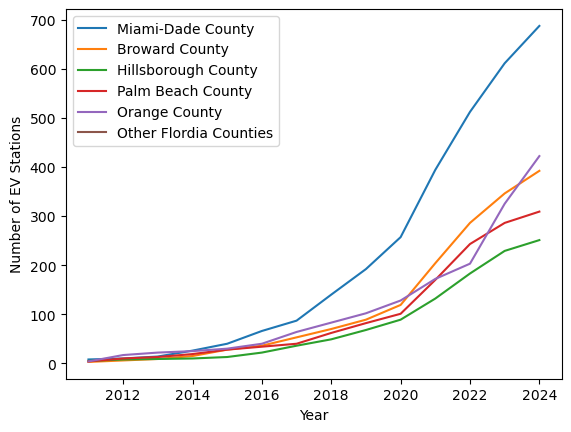

In [37]:
# Create a separate plot for each county
counties = ['Miami-Dade County', 'Broward County', 'Hillsborough County', 'Palm Beach County', 'Orange County', 'Other Flordia Counties']

fig, ax = plt.subplots()
for county in counties:
    county_data = df_fl_topfive[df_fl_topfive['cleaned_county'] == county]
    ax.plot(county_data['year'], county_data['cumulative_ev_stations'], label=county)

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of EV Stations')
ax.legend()

# Show the plot
plt.show()